AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [63]:
import pandas as pd

# Load the dataset
url = 'titanic.csv'
df = pd.read_csv(url)

# Display first 10 rows, last 20 rows, dataset info, and description
first_10 = df.head(10)
last_20 = df.tail(20)
info = df.info
description = df.describe()

# Combine results into a single table format
print("First 10 Rows:")
print(first_10)

print("\nLast 20 Rows:")
print(last_20)

print("\nDataset Information:")
print(info)

print("\nDataset Description:")
print(description)


First 10 Rows:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing Values in Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


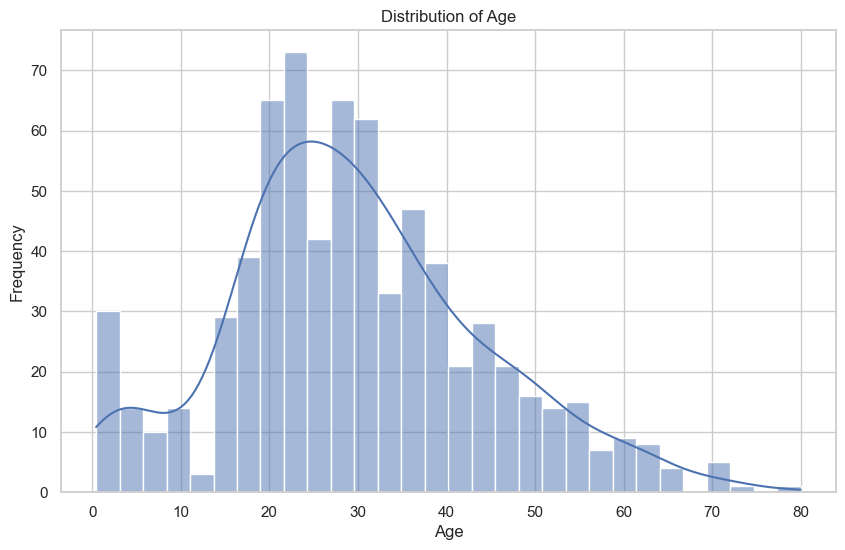


'Dropped Cabin' column due to too many missing values.

Missing values in 'Embarked' after filling: 2

Invalid 'Survived' values after correction: 891

Missing or incorrect 'Fare' values handled. Current missing: 7

Cleaned Dataset Preview:
    PassengerId Survived  Pclass  \
0            1     None       3   
1            2     None       1   
2            3     None       3   
3            4     None       1   
4            5     None       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = r"D:\study\SCSE\NonGradedEX5\titanic.csv"
df = pd.read_csv(url)

# 1. Find missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values)

# 2. Handling missing values in the 'Age' column
# 2.1. Plot the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2. Calculate central tendency
age_median = df['Age'].median()  # Using median is often more robust to outliers

# 2.3. Fill missing values with median
df['Age'].fillna(age_median)


# 3. Handle missing values in the 'Cabin' column
# If more than 75% of the 'Cabin' values are missing, drop the column
missing_cabin = df['Cabin'].isnull().sum()
if missing_cabin > 0.75 * len(df):
    df.drop(columns='Cabin', inplace=True)
    print("\n'Dropped Cabin' column due to too many missing values.")
else:
    df['Cabin'].fillna('Unknown')

# 4. Handle missing values in the 'Embarked' column
# Since 'Embarked' has a few missing values, we can fill it with the mode (most frequent value)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked)
print("\nMissing values in 'Embarked' after filling:", df['Embarked'].isnull().sum())

# 5. Handle incorrect data in the 'Survived' column
# We expect only 0 or 1 in the 'Survived' column, so we filter out invalid values
valid_survived_values = [0, 1]
df['Survived'] = df['Survived'].apply(lambda x: x if x in valid_survived_values else None)
print("\nInvalid 'Survived' values after correction:", df['Survived'].isnull().sum())

# 6. Handle incorrectly formatted data in the 'Fare' column
# Convert 'Fare' to numeric, forcing any non-numeric entries to be NaN, and fill missing values
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare)

print("\nMissing or incorrect 'Fare' values handled. Current missing:", df['Fare'].isnull().sum())

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset Preview:\n", df.head())

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average Fare by Pclass:
 Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


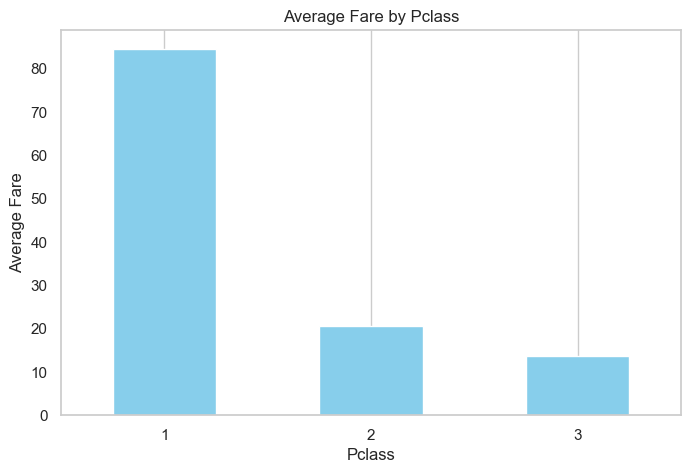

Average Fare by Sex:
 Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


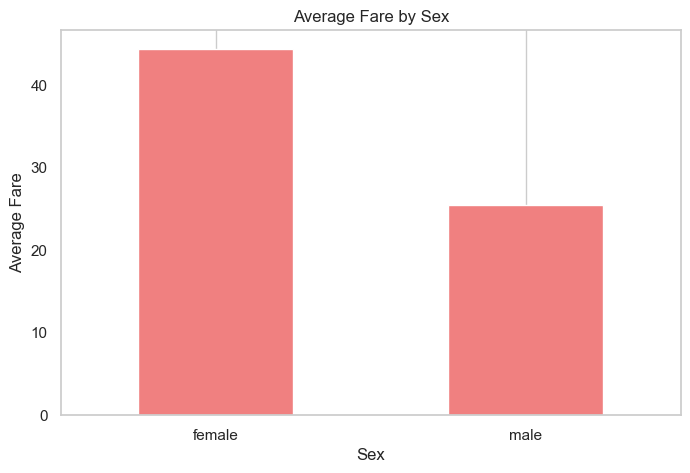

In [49]:
average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Pclass:\n", average_fare_by_pclass)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
average_fare_by_pclass.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("Average Fare by Sex:\n", average_fare_by_sex)

plt.figure(figsize=(8, 5))
average_fare_by_sex.plot(kind='bar', color='lightcoral')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

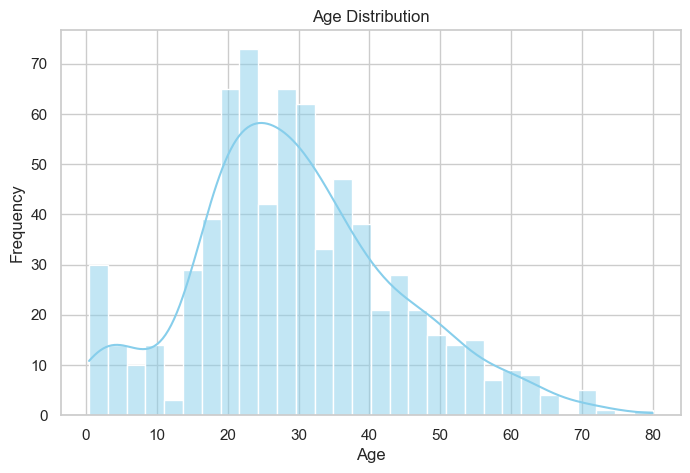

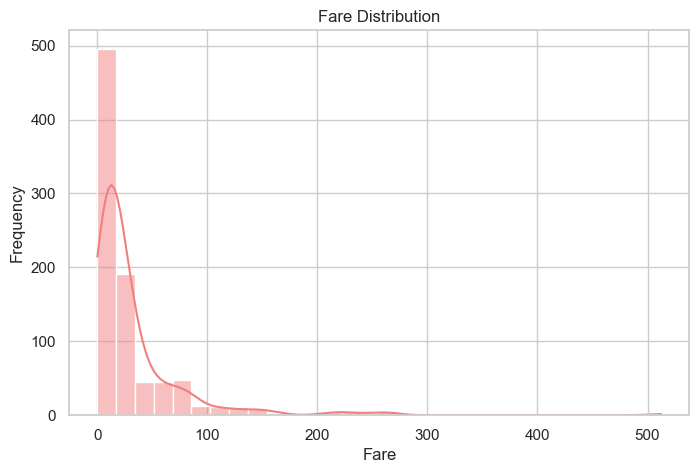

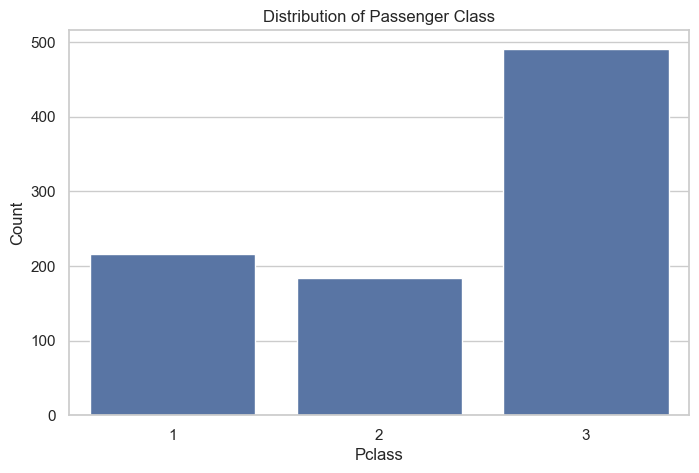

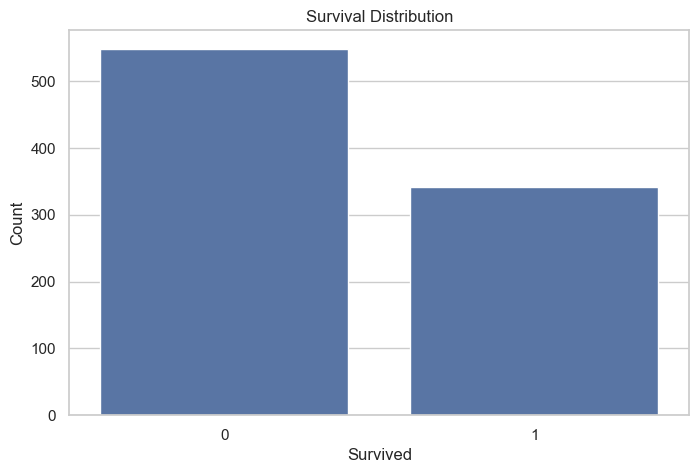

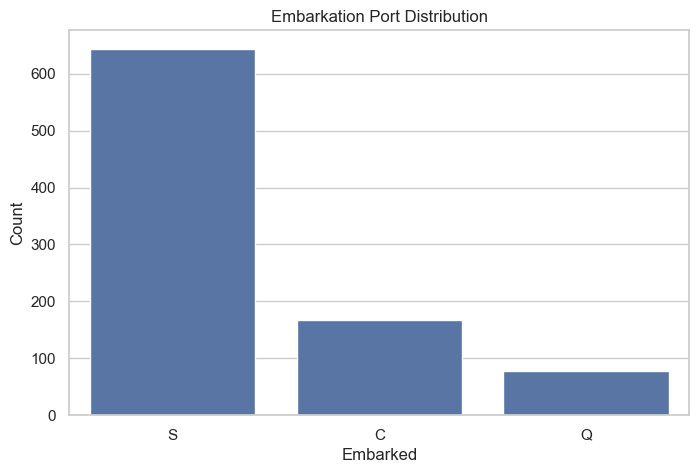

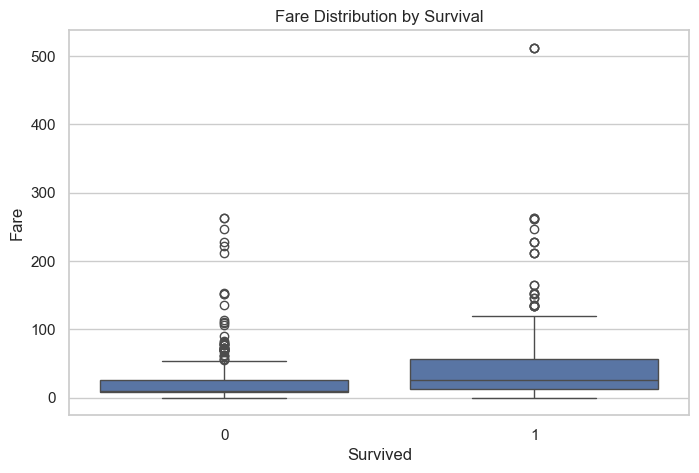

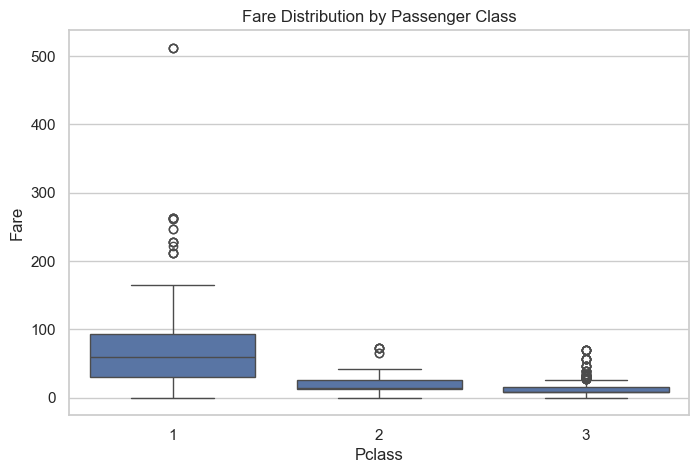

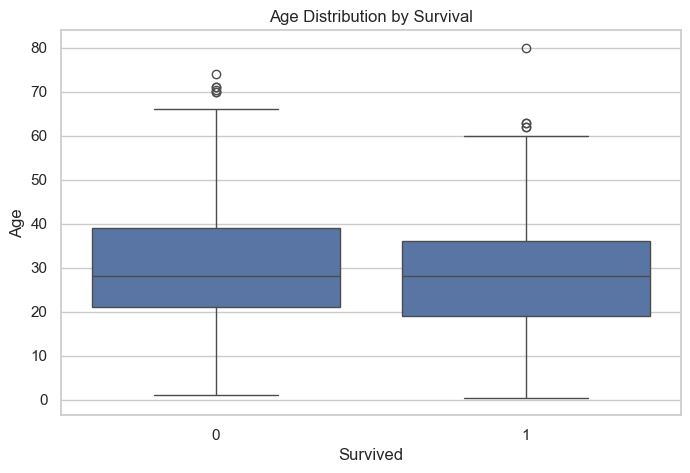

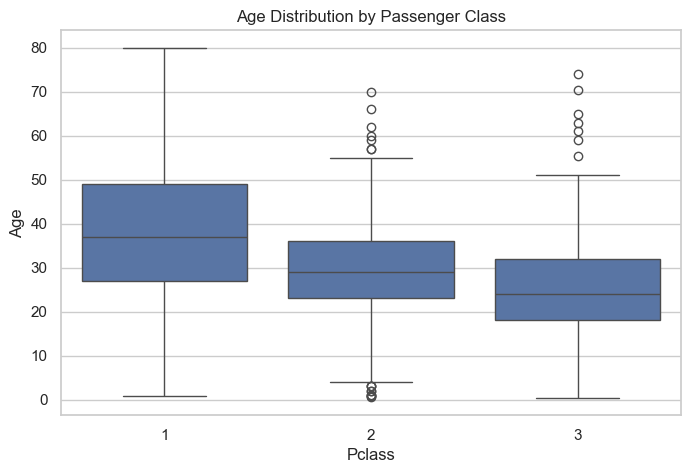

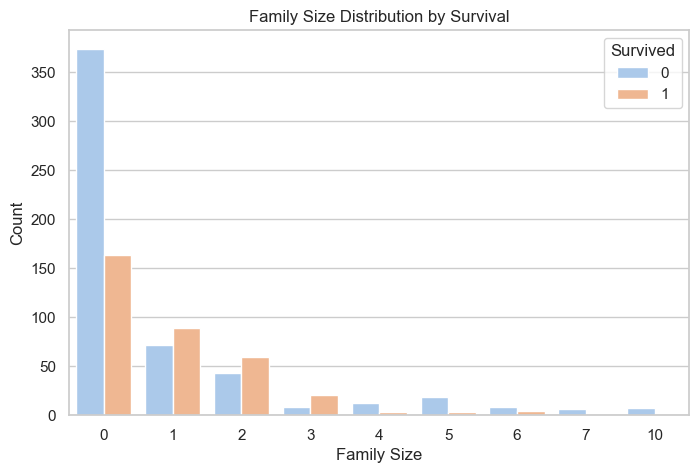

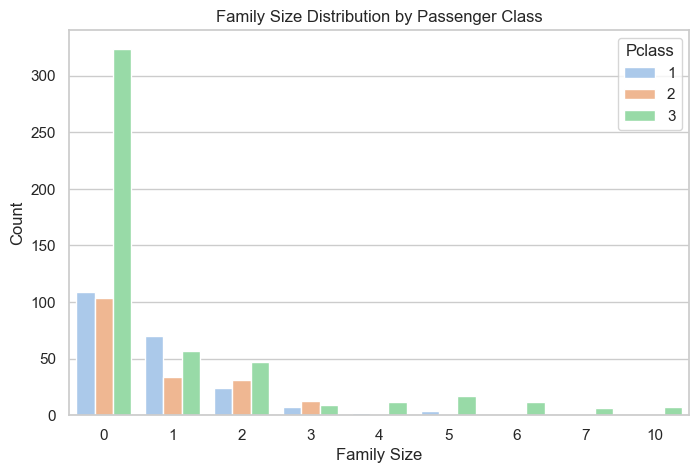

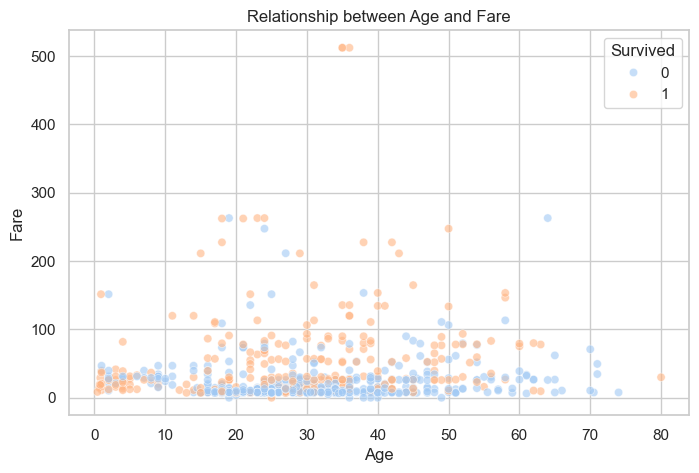

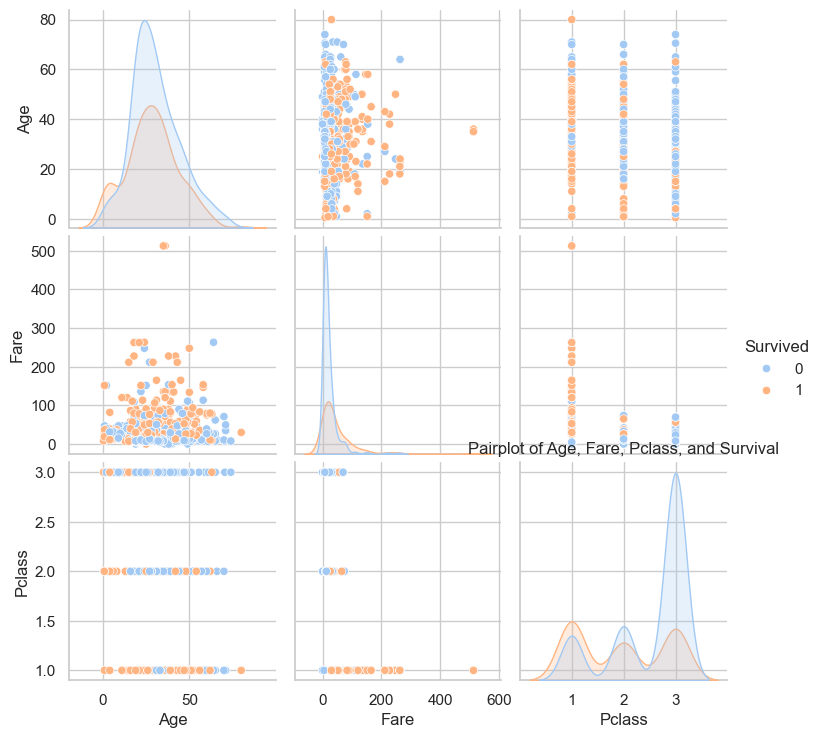

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True, color='lightcoral')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df)
plt.title('Embarkation Port Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['FamilySize'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(8, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='pastel')
plt.title('Family Size Distribution by Survival')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 11. Plot the distribution of 'FamilySize' grouped by 'Pclass'
plt.figure(figsize=(8, 5))
sns.countplot(x='FamilySize', hue='Pclass', data=df, palette='pastel')
plt.title('Family Size Distribution by Passenger Class')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='pastel', alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Other possibilities to show relationships
# A pairplot can show relationships between multiple features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='pastel')
plt.title('Pairplot of Age, Fare, Pclass, and Survival')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
              PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


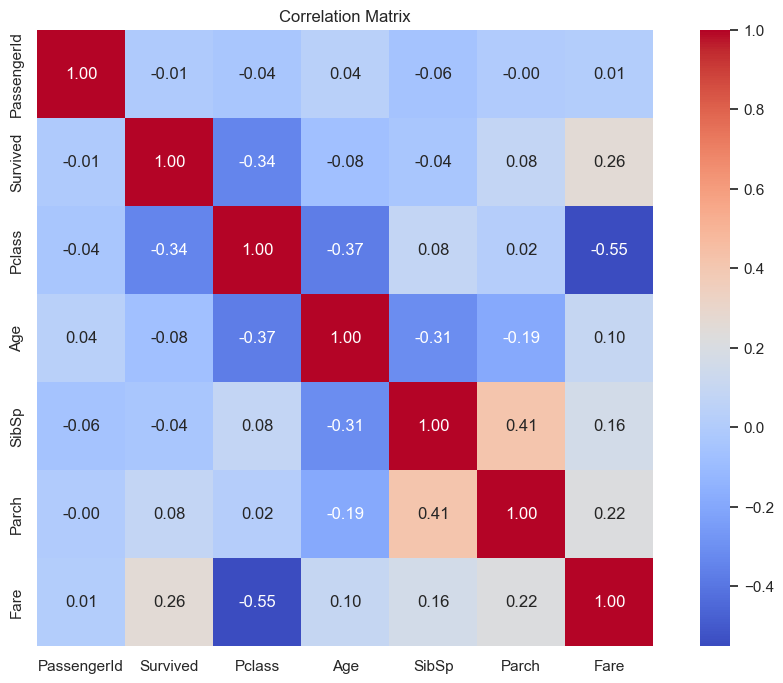

Correlation between Age and Fare: 0.10
Correlation between Survived and Pclass: -0.34
Correlation between SibSp and Parch: 0.41
Correlation between Age and Pclass: -0.37


In [67]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 1. Generate a correlation matrix for the entire dataset
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

# 2. Find correlation between 'Age' and 'Fare'
if 'Age' in numeric_df.columns and 'Fare' in numeric_df.columns:
    age_fare_correlation = numeric_df['Age'].corr(numeric_df['Fare'])
    print(f"Correlation between Age and Fare: {age_fare_correlation:.2f}")

# 3. Explore other possible correlations
if 'Survived' in numeric_df.columns and 'Pclass' in numeric_df.columns:
    survived_pclass_correlation = numeric_df['Survived'].corr(numeric_df['Pclass'])
    print(f"Correlation between Survived and Pclass: {survived_pclass_correlation:.2f}")

if 'SibSp' in numeric_df.columns and 'Parch' in numeric_df.columns:
    sibsp_parch_correlation = numeric_df['SibSp'].corr(numeric_df['Parch'])
    print(f"Correlation between SibSp and Parch: {sibsp_parch_correlation:.2f}")

if 'Age' in numeric_df.columns and 'Pclass' in numeric_df.columns:
    age_pclass_correlation = numeric_df['Age'].corr(numeric_df['Pclass'])
    print(f"Correlation between Age and Pclass: {age_pclass_correlation:.2f}")
